<a href="https://colab.research.google.com/github/Username0515/jetbot_autopilot/blob/2020-08-10/yolov3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15298, done.
remote: Counting objects: 100% (159/159), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 15298 (delta 158), reused 144 (delta 144), pack-reused 15139
Receiving objects: 100% (15298/15298), 13.67 MiB | 17.57 MiB/s, done.
Resolving deltas: 100% (10403/10403), done.


In [2]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/darknet


In [3]:
# make darknet (builds darknet so that you can then use the darknet executable file to run or train object detectors)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
  

In [4]:
!mkdir train
!unzip /content/data.zip -d /content/darknet/train/data

Archive:  /content/data.zip
  inflating: /content/darknet/train/data/classes.txt  
  inflating: /content/darknet/train/data/predefined_classes.txt  
  inflating: /content/darknet/train/data/road_1.jpg  
  inflating: /content/darknet/train/data/road_1.txt  
  inflating: /content/darknet/train/data/xy_049_050_00fe26d0-e5dc-11eb-891f-8c554abddce7-Copy1.jpg  
  inflating: /content/darknet/train/data/xy_049_050_00fe26d0-e5dc-11eb-891f-8c554abddce7-Copy1.txt  
  inflating: /content/darknet/train/data/xy_049_050_00fe26d0-e5dc-11eb-891f-8c554abddce7-Copy2.jpg  
  inflating: /content/darknet/train/data/xy_049_050_00fe26d0-e5dc-11eb-891f-8c554abddce7-Copy2.txt  
  inflating: /content/darknet/train/data/xy_049_050_00fe26d0-e5dc-11eb-891f-8c554abddce7.jpg  
  inflating: /content/darknet/train/data/xy_049_050_00fe26d0-e5dc-11eb-891f-8c554abddce7.txt  
  inflating: /content/darknet/train/data/xy_049_050_0a2c8c20-e5db-11eb-891f-8c554abddce7.jpg  
  inflating: /content/darknet/train/data/xy_049_050_0a

In [5]:
!python train/generate_test.py

In [6]:
!./darknet detector train train/obj.data cfg/yolov3-tiny_obj.cfg yolov3-tiny.conv.11 -dont_show

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 16 Avg (IOU: 0.779744), count: 3, class_loss = 0.106921, iou_loss = 0.092071, total_loss = 0.198992 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 23 Avg (IOU: 0.795863), count: 7, class_loss = 0.530170, iou_loss = 0.259993, total_loss = 0.790163 
 total_bbox = 197144, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 16 Avg (IOU: 0.917588), count: 1, class_loss = 0.043922, iou_loss = 0.005701, total_loss = 0.049623 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 23 Avg (IOU: 0.558573), count: 12, class_loss = 2.200315, iou_loss = 1.594319, total_loss = 3.794635 
 total_bbox = 197157, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 16 Avg (IOU: 0.751860), count: 2, class_loss = 0.022821, iou_loss = 0.076884, total_loss = 0.099705 
v3 (mse loss, Normali

In [8]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3-tiny_obj.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3-tiny_obj.cfg
%cd ..

/content/darknet/cfg
/content/darknet


In [9]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [10]:
import time

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 128 

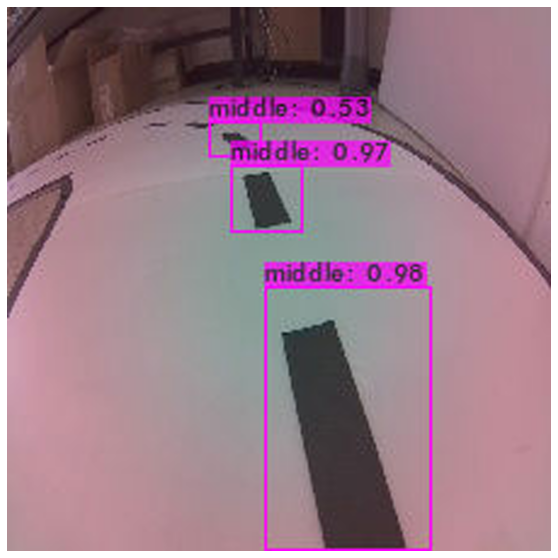

2.5588302612304688

In [15]:
timea = time.time()
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test /content/darknet/train/obj.data cfg/yolov3-tiny_obj.cfg /content/darknet/train/yolov3-tiny_obj_last.weights /content/xy_049_050_6949f9f0-e5da-11eb-891f-8c554abddce7-Copy1.jpg -thresh 0.3
imShow('predictions.jpg')
time.time() -timea